#                                        Project 1 - Exploratory Data Analysis (EDA) on Retail Sales Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.Data Loading and Cleaning

In [4]:
#Load the retail sales dataset
retail_data_filePath ="CSV files/retail_sales_dataset.csv"
retail_data=pd.read_csv(retail_data_filePath)

#Load the Nutrition Facts for McDonald's Menu dataset
mcdonald_menu_filePath ="CSV files/menu.csv"
mcdonald_menu_data=pd.read_csv(mcdonald_menu_filePath)

In [10]:
# Display few rows of data 
print("Few rows of Retail Sales data")
retail_data.head()

Few rows of Retail Sales data


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [11]:
# Display few rows of data
print("Few rows of Nutrition Facts for McDonald's Menu data")
mcdonald_menu_data.head()

Few rows of Nutrition Facts for McDonald's Menu data


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [15]:
print("Retail sales dataset information:\n")
retail_data.info()

print("\nNutrition Facts for McDonald's Menu dataset information:\n")
mcdonald_menu_data.info()

Retail sales dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB

Nutrition Facts for McDonald's Menu dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category      

In [18]:
# Checking missing values
print("Missing values in Retail sales dataset:\n")
print(retail_data.isnull().sum())

print("\nMisssing values in Nutrition Facts for McDonald's Menu dataset :\n")
print(mcdonald_menu_data.isnull().sum())

Missing values in Retail sales dataset:

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Misssing values in Nutrition Facts for McDonald's Menu dataset :

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein         

In [29]:
# Remove missing values 
retail_duplicates = retail_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {retail_duplicates}")

mcdonald_menu_duplicates = mcdonald_menu_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {mcdonald_menu_duplicates}")


Number of duplicate rows: 0

Number of duplicate rows: 0


In [57]:
# Retail sales dataset
# Convert date column
retail_data['Date'] = pd.to_datetime(retail_data['Date'], errors='coerce')

# Convert numeric columns
retail_data['Age'] = pd.to_numeric(retail_data['Age'], errors='coerce')
retail_data['Quantity'] = pd.to_numeric(retail_data['Quantity'], errors='coerce')
retail_data['Price per Unit'] = pd.to_numeric(retail_data['Price per Unit'], errors='coerce')
retail_data['Total Amount'] = pd.to_numeric(retail_data['Total Amount'], errors='coerce')

# Nutrition Facts for McDonald's Menu dataset
# Convert numeric columns (if some are strings)
numeric_cols = [
    "Calories", "Calories from Fat", "Total Fat", "Total Fat (% Daily Value)",
    "Saturated Fat", "Saturated Fat (% Daily Value)", "Trans Fat",
    "Carbohydrates", "Carbohydrates (% Daily Value)", "Dietary Fiber",
    "Dietary Fiber (% Daily Value)", "Sugars", "Protein",
    "Vitamin A (% Daily Value)", "Vitamin C (% Daily Value)",
    "Calcium (% Daily Value)", "Iron (% Daily Value)"
]

for col in numeric_cols:
    mcdonald_menu_data[col] = pd.to_numeric(mcdonald_menu_data[col], errors='coerce')

# Exploratory Data Analysis (EDA)

# 1) Retail Sales Dataset

a. Descriptive Statistics

In [39]:
# Descriptive Statistics 
# Mode
print("\nMode:")
display(retail_data.mode().iloc[0])

# Mean
print("\nMean of numeric columns:")
print(retail_data.mean(numeric_only=True))

# Median
print("\nMedian of numeric columns:")
print(retail_data.median(numeric_only=True))

# Standard Deviation
print("\nStandard Deviation:")
print(retail_data.std(numeric_only=True))


Mode:


Transaction ID                        1
Date                2023-05-16 00:00:00
Customer ID                     CUST001
Gender                           Female
Age                                43.0
Product Category               Clothing
Quantity                            4.0
Price per Unit                     50.0
Total Amount                       50.0
Name: 0, dtype: object


Mean of numeric columns:
Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median of numeric columns:
Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Standard Deviation:
Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


b. Time Series Analysis

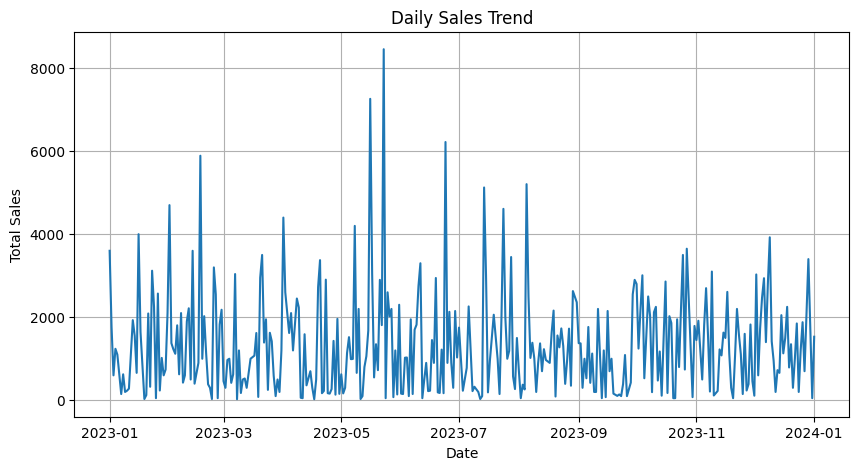

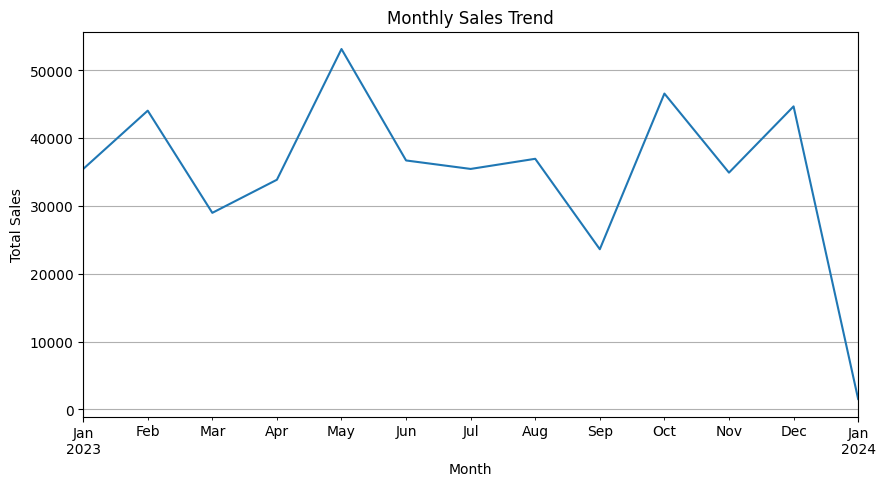

In [40]:
# Daily sales trend
daily_sales = retail_data.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# Monthly trend
monthly_sales = retail_data.groupby(retail_data['Date'].dt.to_period('M'))['Total Amount'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

c. Customer & Product Analysis

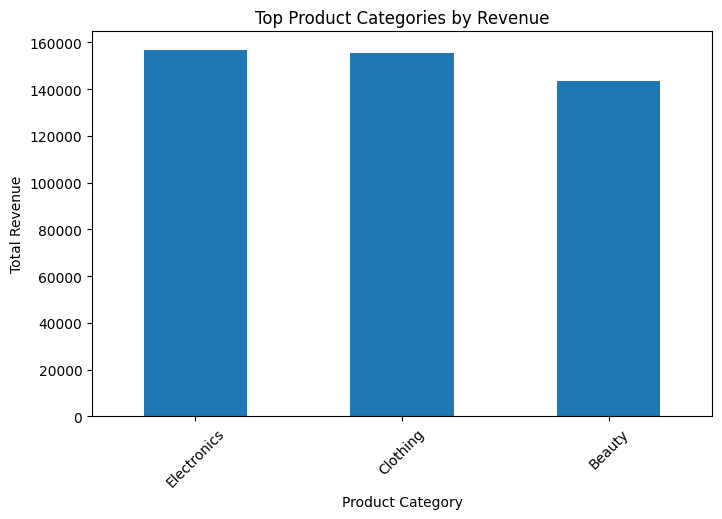

In [42]:
top_categories = retail_data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
top_categories.plot(kind='bar')
plt.title("Top Product Categories by Revenue")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

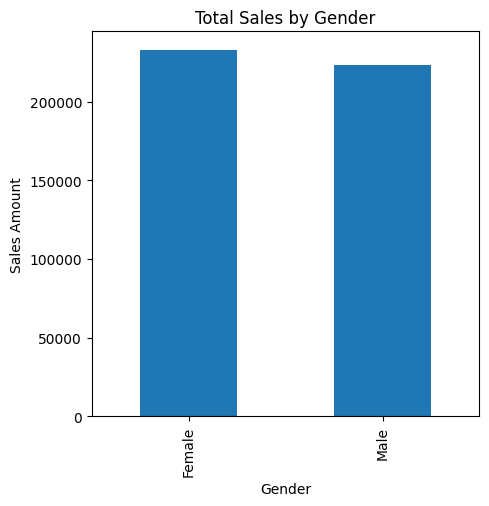

In [55]:
# Gender-Based Spending
gender_sales = retail_data.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(5,5))
gender_sales.plot(kind='bar')
plt.title("Total Sales by Gender")
plt.ylabel("Sales Amount")
plt.show()

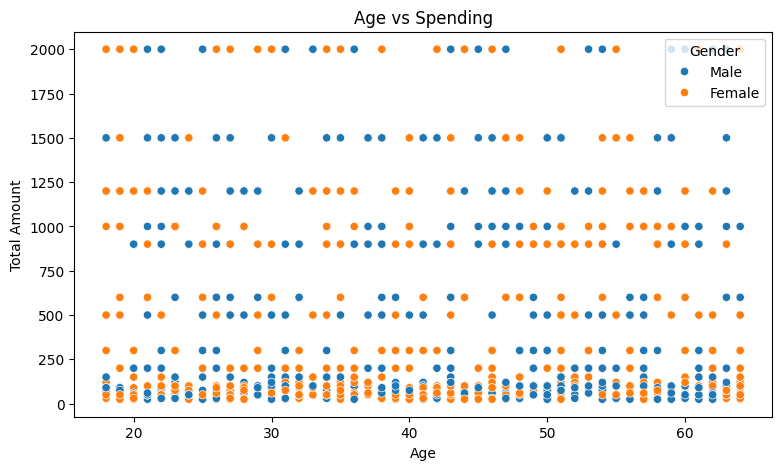

In [47]:
# Age vs Total Amount
plt.figure(figsize=(9,5))
sns.scatterplot(data=retail_data, x='Age', y='Total Amount', hue='Gender')
plt.title("Age vs Spending")
plt.show()

d. Visualization

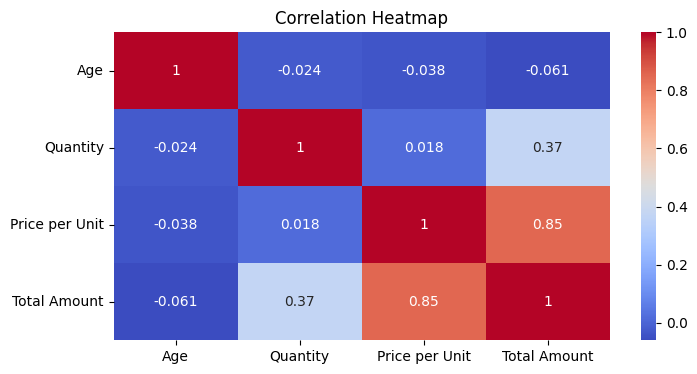

In [50]:
# Present insights through heatmap
plt.figure(figsize=(8,4))
sns.heatmap(retail_data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Recommendations based on the EDA.
1. Electronics and Clothing categories show strong sales—consider boosting stock and offers.
2. Younger customers (25–35) contribute high purchase volume; target them with ads.
3. Female customers spend more.
4. Sales spikes appear in specific months—apply seasonal marketing campaigns.
5. Encourage repeat purchases by offering loyalty points to frequent customers.

# 2) Nutrition Facts for McDonald's Menu

In [58]:
# Descriptive Statistics
# Mode
print("\nMode:")
display(mcdonald_menu_data.mode().iloc[0])

# Mean
print("\nMean of numeric columns:")
print(mcdonald_menu_data.mean(numeric_only=True))

# Median
print("\nMedian of numeric columns:")
print(mcdonald_menu_data.median(numeric_only=True))

# Standard Deviation
print("\nStandard Deviation:")
print(mcdonald_menu_data.std(numeric_only=True))


Mode:


Category                                Coffee & Tea
Item                             1% Low Fat Milk Jug
Serving Size                            16 fl oz cup
Calories                                         0.0
Calories from Fat                                0.0
Total Fat                                        0.0
Total Fat (% Daily Value)                        0.0
Saturated Fat                                    0.0
Saturated Fat (% Daily Value)                    0.0
Trans Fat                                        0.0
Cholesterol                                      0.0
Cholesterol (% Daily Value)                      0.0
Sodium                                         180.0
Sodium (% Daily Value)                           6.0
Carbohydrates                                    0.0
Carbohydrates (% Daily Value)                   14.0
Dietary Fiber                                    1.0
Dietary Fiber (% Daily Value)                    0.0
Sugars                                        


Mean of numeric columns:
Calories                         368.269231
Calories from Fat                127.096154
Total Fat                         14.165385
Total Fat (% Daily Value)         21.815385
Saturated Fat                      6.007692
Saturated Fat (% Daily Value)     29.965385
Trans Fat                          0.203846
Cholesterol                       54.942308
Cholesterol (% Daily Value)       18.392308
Sodium                           495.750000
Sodium (% Daily Value)            20.676923
Carbohydrates                     47.346154
Carbohydrates (% Daily Value)     15.780769
Dietary Fiber                      1.630769
Dietary Fiber (% Daily Value)      6.530769
Sugars                            29.423077
Protein                           13.338462
Vitamin A (% Daily Value)         13.426923
Vitamin C (% Daily Value)          8.534615
Calcium (% Daily Value)           20.973077
Iron (% Daily Value)               7.734615
dtype: float64

Median of numeric columns:
Calorie

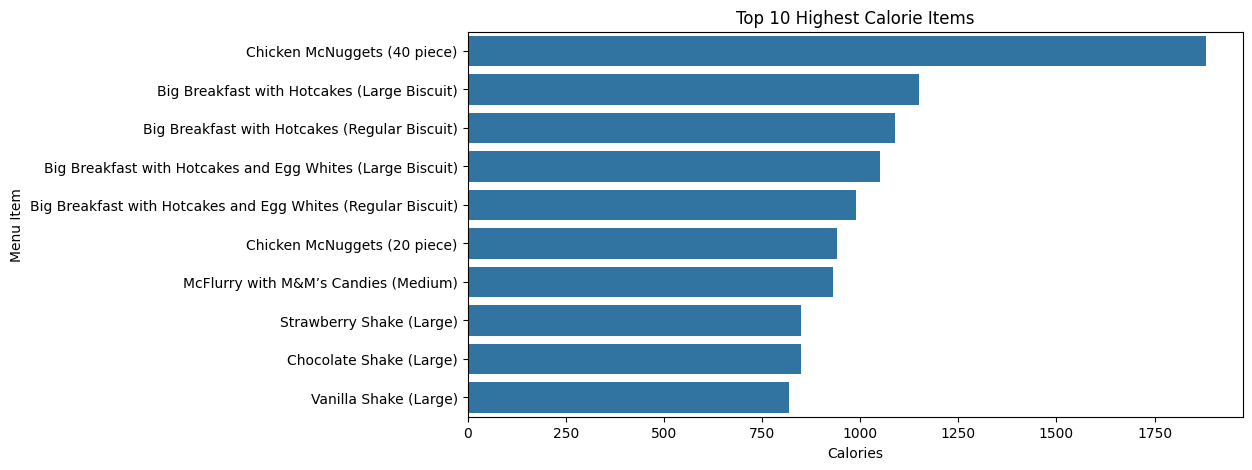

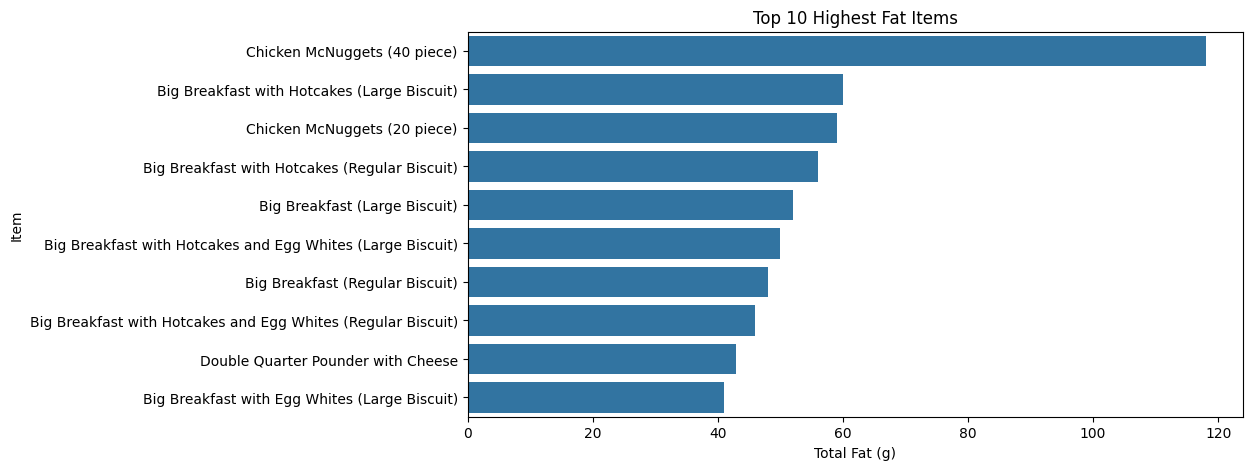

In [60]:
# Analysis
# Highest Calorie Items
top_calories = mcdonald_menu_data.nlargest(10, "Calories")[["Item", "Calories"]]

plt.figure(figsize=(10,5))
sns.barplot(data=top_calories, x="Calories", y="Item")
plt.title("Top 10 Highest Calorie Items")
plt.xlabel("Calories")
plt.ylabel("Menu Item")
plt.show()

# Highest Fat Items
top_fat = mcdonald_menu_data.nlargest(10, "Total Fat")[["Item", "Total Fat"]]

plt.figure(figsize=(10,5))
sns.barplot(data=top_fat, x="Total Fat", y="Item")
plt.title("Top 10 Highest Fat Items")
plt.xlabel("Total Fat (g)")
plt.ylabel("Item")
plt.show()

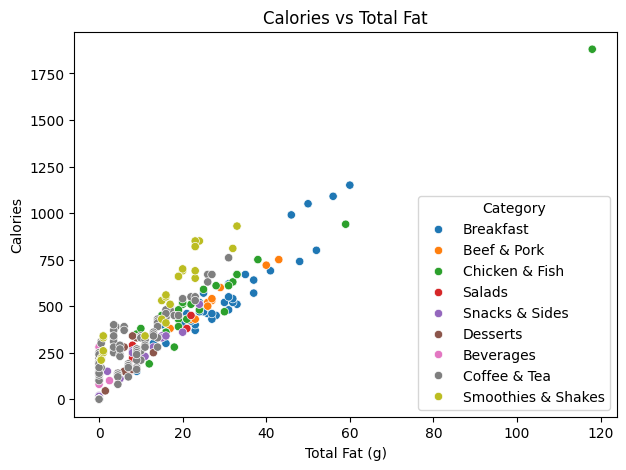

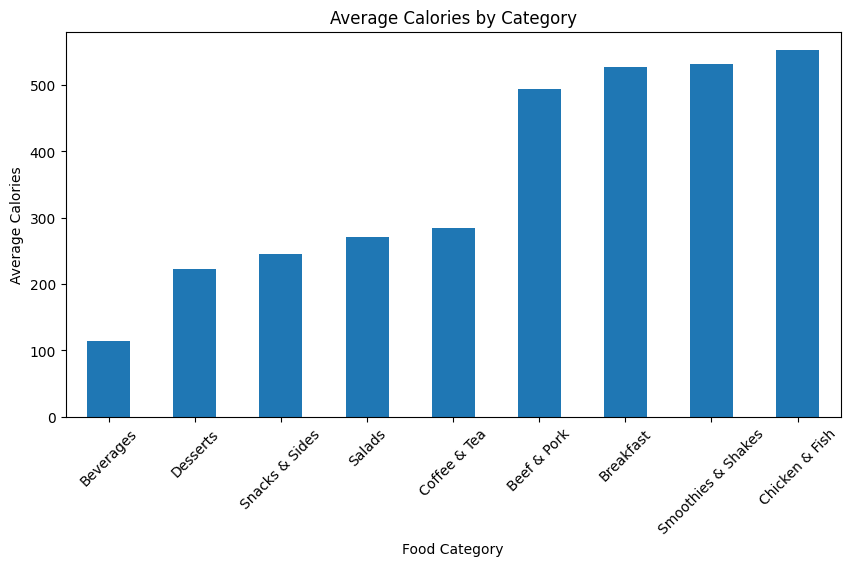

In [61]:
# Calories vs Fat Relationship
plt.figure(figsize=(7,5))
sns.scatterplot(data=mcdonald_menu_data, x="Total Fat", y="Calories", hue="Category")
plt.title("Calories vs Total Fat")
plt.xlabel("Total Fat (g)")
plt.ylabel("Calories")
plt.show()

# Category-wise Average Calories
category_avg = mcdonald_menu_data.groupby("Category")["Calories"].mean().sort_values()

plt.figure(figsize=(10,5))
category_avg.plot(kind="bar")
plt.title("Average Calories by Category")
plt.ylabel("Average Calories")
plt.xlabel("Food Category")
plt.xticks(rotation=45)
plt.show()

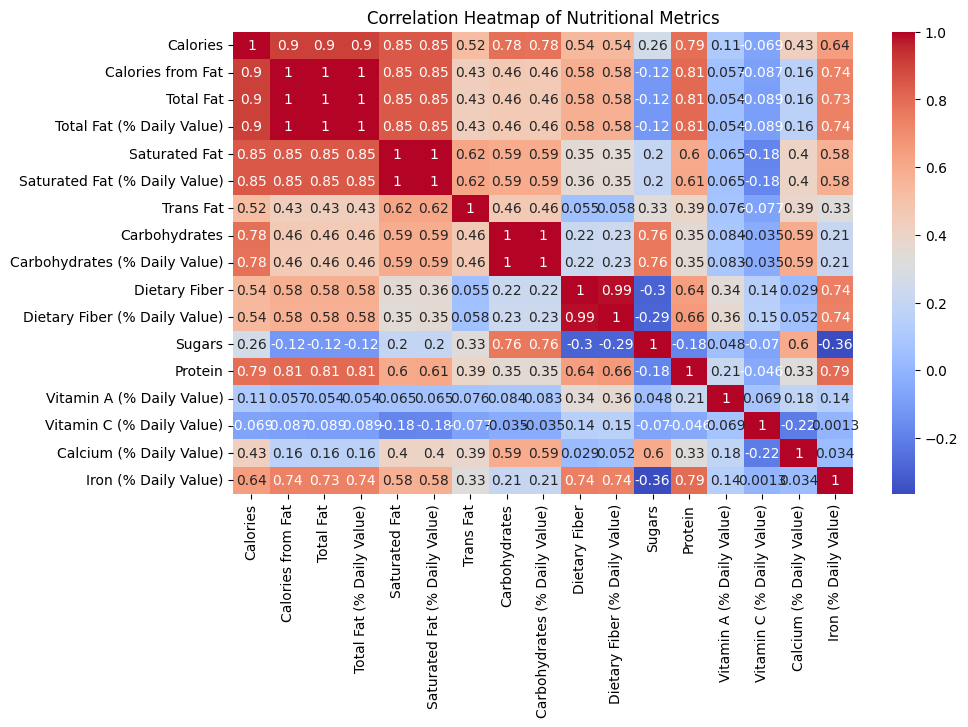

In [62]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(mcdonald_menu_data[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Nutritional Metrics")
plt.show()

# Recommendations
1. Breakfast items like “Sausage McMuffin with Egg” have the highest calories and fat.
2. Calories strongly correlate with Total Fat and Saturated Fat (unhealthy indicators).
3. Categories vary significantly: Breakfast items are generally higher in calories.
4. High-fat items often have low fiber—less filling and not nutritious.
5. Customers looking for healthier options should choose items with lower fat and higher fiber content.